In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
applicative = pd.read_csv("applicative.csv")
applicative.head()

,transformTime,features,fitTime,testCount,trainCount,mae,rmse,mse,r2,algorithm,dataset,family,platformId,runId,splitter,silhouette,f1,weightedRecall,weightedPrecision,accuracy
0,2662.0,128.0,18159.0,678.0,2797.0,11.397804,21.727306,472.075847,0.914381,Linear,drift-4,regression,21,0,random-80-20,NaN,NaN,NaN,NaN,NaN
1,3924.0,128.0,17422.0,678.0,2797.0,11.397804,21.727306,472.075847,0.914381,Linear,drift-4,regression,21,1,random-80-20,NaN,NaN,NaN,NaN,NaN
2,3377.0,128.0,15445.0,678.0,2797.0,11.397804,21.727306,472.075847,0.914381,Linear,drift-4,regression,15,0,random-80-20,NaN,NaN,NaN,NaN,NaN
3,1037.0,128.0,14745.0,678.0,2797.0,11.397804,21.727306,472.075847,0.914381,Linear,drift-4,regression,15,1,random-80-20,NaN,NaN,NaN,NaN,NaN
4,3357.0,128.0,16151.0,678.0,2797.0,11.397804,21.727306,472.075847,0.914381,Linear,drift-4,regression,46,0,random-80-20,NaN,NaN,NaN,NaN,NaN


In [3]:
data = applicative.groupby(["dataset", "algorithm", "platformId"]).agg({"fitTime": ["mean", "std"]})
data = data["fitTime"]
data = data.reset_index()
data["variation"] = data["std"] / data["mean"]
data.head()

,dataset,algorithm,platformId,mean,std,variation
0,drift-3,BisectingKMeans,0,76549.0,76.367532,0.000998
1,drift-3,BisectingKMeans,1,116818.0,2940.149996,0.025169
2,drift-3,BisectingKMeans,2,106439.0,1127.128209,0.010589
3,drift-3,BisectingKMeans,3,92546.5,6889.341369,0.074442
4,drift-3,BisectingKMeans,4,69797.0,6605.791550,0.094643


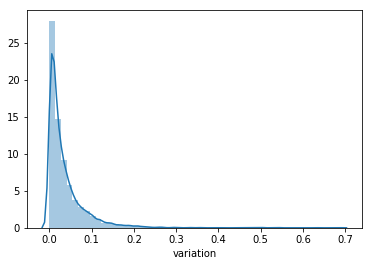

q95=0.123
q99=0.217


In [12]:
sns.distplot(data["variation"])
plt.show()

q95 = data["variation"].quantile(0.95)
q99 = data["variation"].quantile(0.99)

print(f"q95={q95:.3f}\nq99={q99:.3f}")

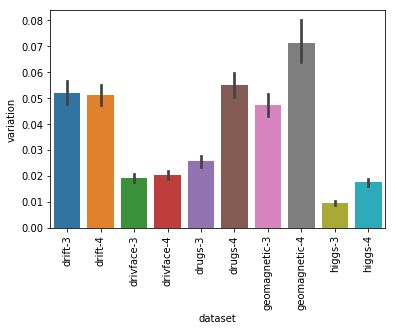

In [5]:
sns.barplot(x="dataset", y="variation", data=data)
plt.xticks(rotation=90)
plt.show()

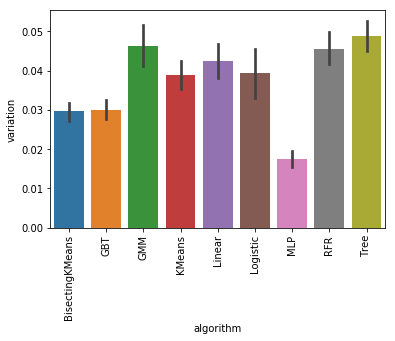

In [16]:
sns.barplot(x="algorithm", y="variation", data=data)
plt.xticks(rotation=90)
plt.show()

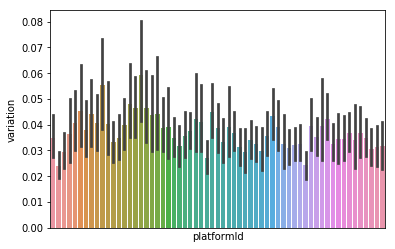

In [18]:
sns.barplot(x="platformId", y="variation", data=data)
plt.gca().get_xaxis().set_ticks([])
plt.show()